In [452]:
#Importing the required libraries.

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy
%matplotlib inline

pd.set_option("display.max_columns", 500)

In [453]:
# Loading the data onto our dataframe.
df = pd.read_csv("Melbourne_housing_FULL.csv")

In [454]:
df.head()

Suburb             Address  Rooms Type      Price Method SellerG       Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  BuildingArea  YearBuilt         CouncilArea  Lattitude  Longtitude             Regionname  Propertycount
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis  3/09/2016       2.5    3067.0       2.0       1.0  1.0     126.0           NaN        NaN  Yarra City Council   -37.8014    144.9958  Northern Metropolitan         4019.0
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin  3/12/2016       2.5    3067.0       2.0       1.0  1.0     202.0           NaN        NaN  Yarra City Council   -37.7996    144.9984  Northern Metropolitan         4019.0
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin  4/02/2016       2.5    3067.0       2.0       1.0  0.0     156.0          79.0     1900.0  Yarra City Council   -37.8079    144.9934  Northern Metropolitan         4019.0
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds  4/02/2016       2.5    3067.0       3.0       2.0  1.0       0.0           NaN        NaN  Yarra City Council   -37.8114    145.0116  Northern Metropolitan         4019.0
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin  4/03/2017       2.5    3067.0       3.0       2.0  0.0     134.0         150.0     1900.0  Yarra City Council   -37.8093    144.9944  Northern Metropolitan         4019.0

In [455]:
# Observing the data before preprocessing.
print(f"Row x Column of the dataset: {df.shape}",end="\n\n")
print(f"Total number of elements in the dataset: {df.size}",end="\n\nInfo about the Dataset:\n")
print(df.info())
print(f"Maximum price of a residence: {df.Price.max()}")
print(f"Minimum price of a residence: {df.Price.min()}")

Row x Column of the dataset: (34857, 21)

Total number of elements in the dataset: 731997

Info about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 no

In [456]:
# Descriptive statistics of the dataset
print(f"Descriptive statistics of the dataset:")
df.describe()

Descriptive statistics of the dataset:


Rooms         Price      Distance      Postcode      Bedroom2      Bathroom           Car       Landsize  BuildingArea     YearBuilt     Lattitude    Longtitude  Propertycount
count  34857.000000  2.724700e+04  34856.000000  34856.000000  26640.000000  26631.000000  26129.000000   23047.000000   13742.00000  15551.000000  26881.000000  26881.000000   34854.000000
mean       3.031012  1.050173e+06     11.184929   3116.062859      3.084647      1.624798      1.728845     593.598993     160.25640   1965.289885    -37.810634    145.001851    7572.888306
std        0.969933  6.414671e+05      6.788892    109.023903      0.980690      0.724212      1.010771    3398.841946     401.26706     37.328178      0.090279      0.120169    4428.090313
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000      0.000000      0.000000       0.000000       0.00000   1196.000000    -38.190430    144.423790      83.000000
25%        2.000000  6.350000e+05      6.400000   3051.000000      2.000000      1.000000      1.000000     224.000000     102.00000   1940.000000    -37.862950    144.933500    4385.000000
50%        3.000000  8.700000e+05     10.300000   3103.000000      3.000000      2.000000      2.000000     521.000000     136.00000   1970.000000    -37.807600    145.007800    6763.000000
75%        4.000000  1.295000e+06     14.000000   3156.000000      4.000000      2.000000      2.000000     670.000000     188.00000   2000.000000    -37.754100    145.071900   10412.000000
max       16.000000  1.120000e+07     48.100000   3978.000000     30.000000     12.000000     26.000000  433014.000000   44515.00000   2106.000000    -37.390200    145.526350   21650.000000

In [457]:
# Clearing the duplicate data and starting the preprocess.
df.drop_duplicates(keep="first")
# There's no duplicate entries.
df.head(3)

Suburb          Address  Rooms Type      Price Method SellerG       Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  BuildingArea  YearBuilt         CouncilArea  Lattitude  Longtitude             Regionname  Propertycount
0  Abbotsford    68 Studley St      2    h        NaN     SS  Jellis  3/09/2016       2.5    3067.0       2.0       1.0  1.0     126.0           NaN        NaN  Yarra City Council   -37.8014    144.9958  Northern Metropolitan         4019.0
1  Abbotsford     85 Turner St      2    h  1480000.0      S  Biggin  3/12/2016       2.5    3067.0       2.0       1.0  1.0     202.0           NaN        NaN  Yarra City Council   -37.7996    144.9984  Northern Metropolitan         4019.0
2  Abbotsford  25 Bloomburg St      2    h  1035000.0      S  Biggin  4/02/2016       2.5    3067.0       2.0       1.0  0.0     156.0          79.0     1900.0  Yarra City Council   -37.8079    144.9934  Northern Metropolitan         4019.0

In [458]:
print(f"Missing values in the dataset:",end=f"\n{df.isnull().sum()}")

Missing values in the dataset:
Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [459]:
df.describe()

Rooms         Price      Distance      Postcode      Bedroom2      Bathroom           Car       Landsize  BuildingArea     YearBuilt     Lattitude    Longtitude  Propertycount
count  34857.000000  2.724700e+04  34856.000000  34856.000000  26640.000000  26631.000000  26129.000000   23047.000000   13742.00000  15551.000000  26881.000000  26881.000000   34854.000000
mean       3.031012  1.050173e+06     11.184929   3116.062859      3.084647      1.624798      1.728845     593.598993     160.25640   1965.289885    -37.810634    145.001851    7572.888306
std        0.969933  6.414671e+05      6.788892    109.023903      0.980690      0.724212      1.010771    3398.841946     401.26706     37.328178      0.090279      0.120169    4428.090313
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000      0.000000      0.000000       0.000000       0.00000   1196.000000    -38.190430    144.423790      83.000000
25%        2.000000  6.350000e+05      6.400000   3051.000000      2.000000      1.000000      1.000000     224.000000     102.00000   1940.000000    -37.862950    144.933500    4385.000000
50%        3.000000  8.700000e+05     10.300000   3103.000000      3.000000      2.000000      2.000000     521.000000     136.00000   1970.000000    -37.807600    145.007800    6763.000000
75%        4.000000  1.295000e+06     14.000000   3156.000000      4.000000      2.000000      2.000000     670.000000     188.00000   2000.000000    -37.754100    145.071900   10412.000000
max       16.000000  1.120000e+07     48.100000   3978.000000     30.000000     12.000000     26.000000  433014.000000   44515.00000   2106.000000    -37.390200    145.526350   21650.000000

In [460]:
cols = list(df.describe().columns)
cols.remove("Postcode")
cols.remove("Lattitude")
cols.remove("Longtitude")

# Z-Score Function.
def Zscore_outlier(df, out):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print(f"Number of outliers for feature {df.name}: {len(out)}")
    print("Outliers:",out)

for col in cols:
    out=[]
    Zscore_outlier(df[col], out)

Number of outliers for feature Rooms: 269
Outliers: [6, 7, 6, 6, 6, 6, 8, 6, 6, 7, 7, 6, 7, 6, 6, 6, 7, 6, 6, 10, 6, 6, 9, 7, 6, 7, 10, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 6, 8, 7, 6, 6, 6, 6, 8, 6, 6, 9, 6, 8, 10, 6, 12, 6, 6, 6, 6, 8, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 8, 6, 6, 6, 6, 8, 8, 12, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 8, 10, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 7, 6, 7, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 9, 6, 6, 6, 6, 6, 7, 6, 6, 8, 6, 9, 6, 6, 6, 6, 6, 7, 6, 6, 8, 8, 6, 7, 7, 6, 6, 6, 8, 6, 8, 6, 6, 6, 6, 10, 7, 6, 6, 16, 7, 7, 6, 8, 6, 6, 6, 7, 6, 6, 12, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 7, 7, 6, 6, 6, 7, 6, 6, 6, 7, 6, 6, 6, 6, 6]
Number of outliers for feature Price: 474
Outliers: [3010000.0, 4735000.0, 3755000.0, 3625000.0, 3000000.0, 5525000.0, 3660000.0, 

In [461]:
for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    med = np.median(df[col])
    for i in df[col]:
        if i > Upper_tail or i < Lower_tail:
                df[col] = df[col].replace(i, med)

In [462]:
# Z-Score Function.
def Zscore_outlier(df, out):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print(f"Number of outliers for feature {df.name}: {len(out)}")
    print("Outliers:",out)

for col in cols:
    out=[]
    Zscore_outlier(df[col], out)
# We have reduced the number of our outliers in the dataset.

Number of outliers for feature Rooms: 236
Outliers: [6, 7, 6, 6, 6, 6, 6, 6, 7, 7, 6, 7, 6, 6, 6, 7, 6, 6, 6, 6, 7, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 7, 7, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 7, 7, 6, 6, 6, 7, 6, 6, 6, 7, 6, 6, 6, 6, 6]
Number of outliers for feature Price: 45
Outliers: [2275000.0, 2255000.0, 2266000.0, 2275000.0, 2285000.0, 2260000.0, 2265000.0, 2265000.0, 2265000.0, 2273000.0, 2270000.0, 2260000.0, 2252000.0, 2260000.0, 2285000.0, 2255000.0, 2260000.0, 

In [463]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             8888
Method               0
SellerG              0
Date                 0
Distance          1468
Postcode             1
Bedroom2          8243
Bathroom          8597
Car              10242
Landsize         12404
BuildingArea     21739
YearBuilt        19311
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount      847
dtype: int64

In [464]:
for column in cols:
    df[column] = df[column].fillna(df[column].mode().iloc[0])
# Filled the null values.
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            1
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         3
Lattitude        7976
Longtitude       7976
Regionname          3
Propertycount       0
dtype: int64

In [469]:
df.dropna(subset=["Postcode","CouncilArea","Regionname"], inplace=True)
df.isnull().sum()
# also dropping the few left overs.

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         0
Lattitude        7973
Longtitude       7973
Regionname          0
Propertycount       0
dtype: int64

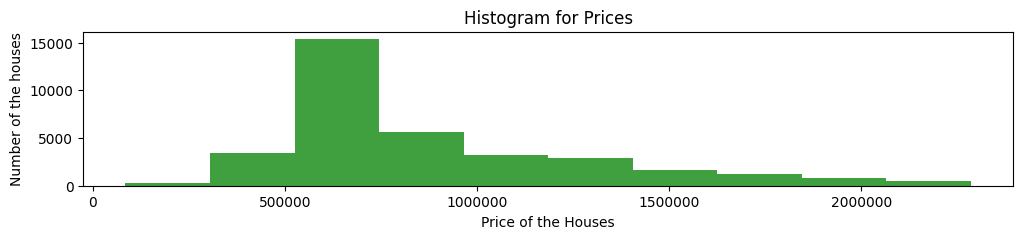

In [480]:
# histogram
fig, ax = plt.subplots(figsize=(12,2))
plt.hist(df["Price"], color="g",alpha=0.75)
ax.xaxis.get_major_formatter().set_scientific(False)
ax.set_title("Histogram for Prices")
ax.set_xlabel("Price of the Houses")
ax.set_ylabel("Number of the houses")
plt.show()

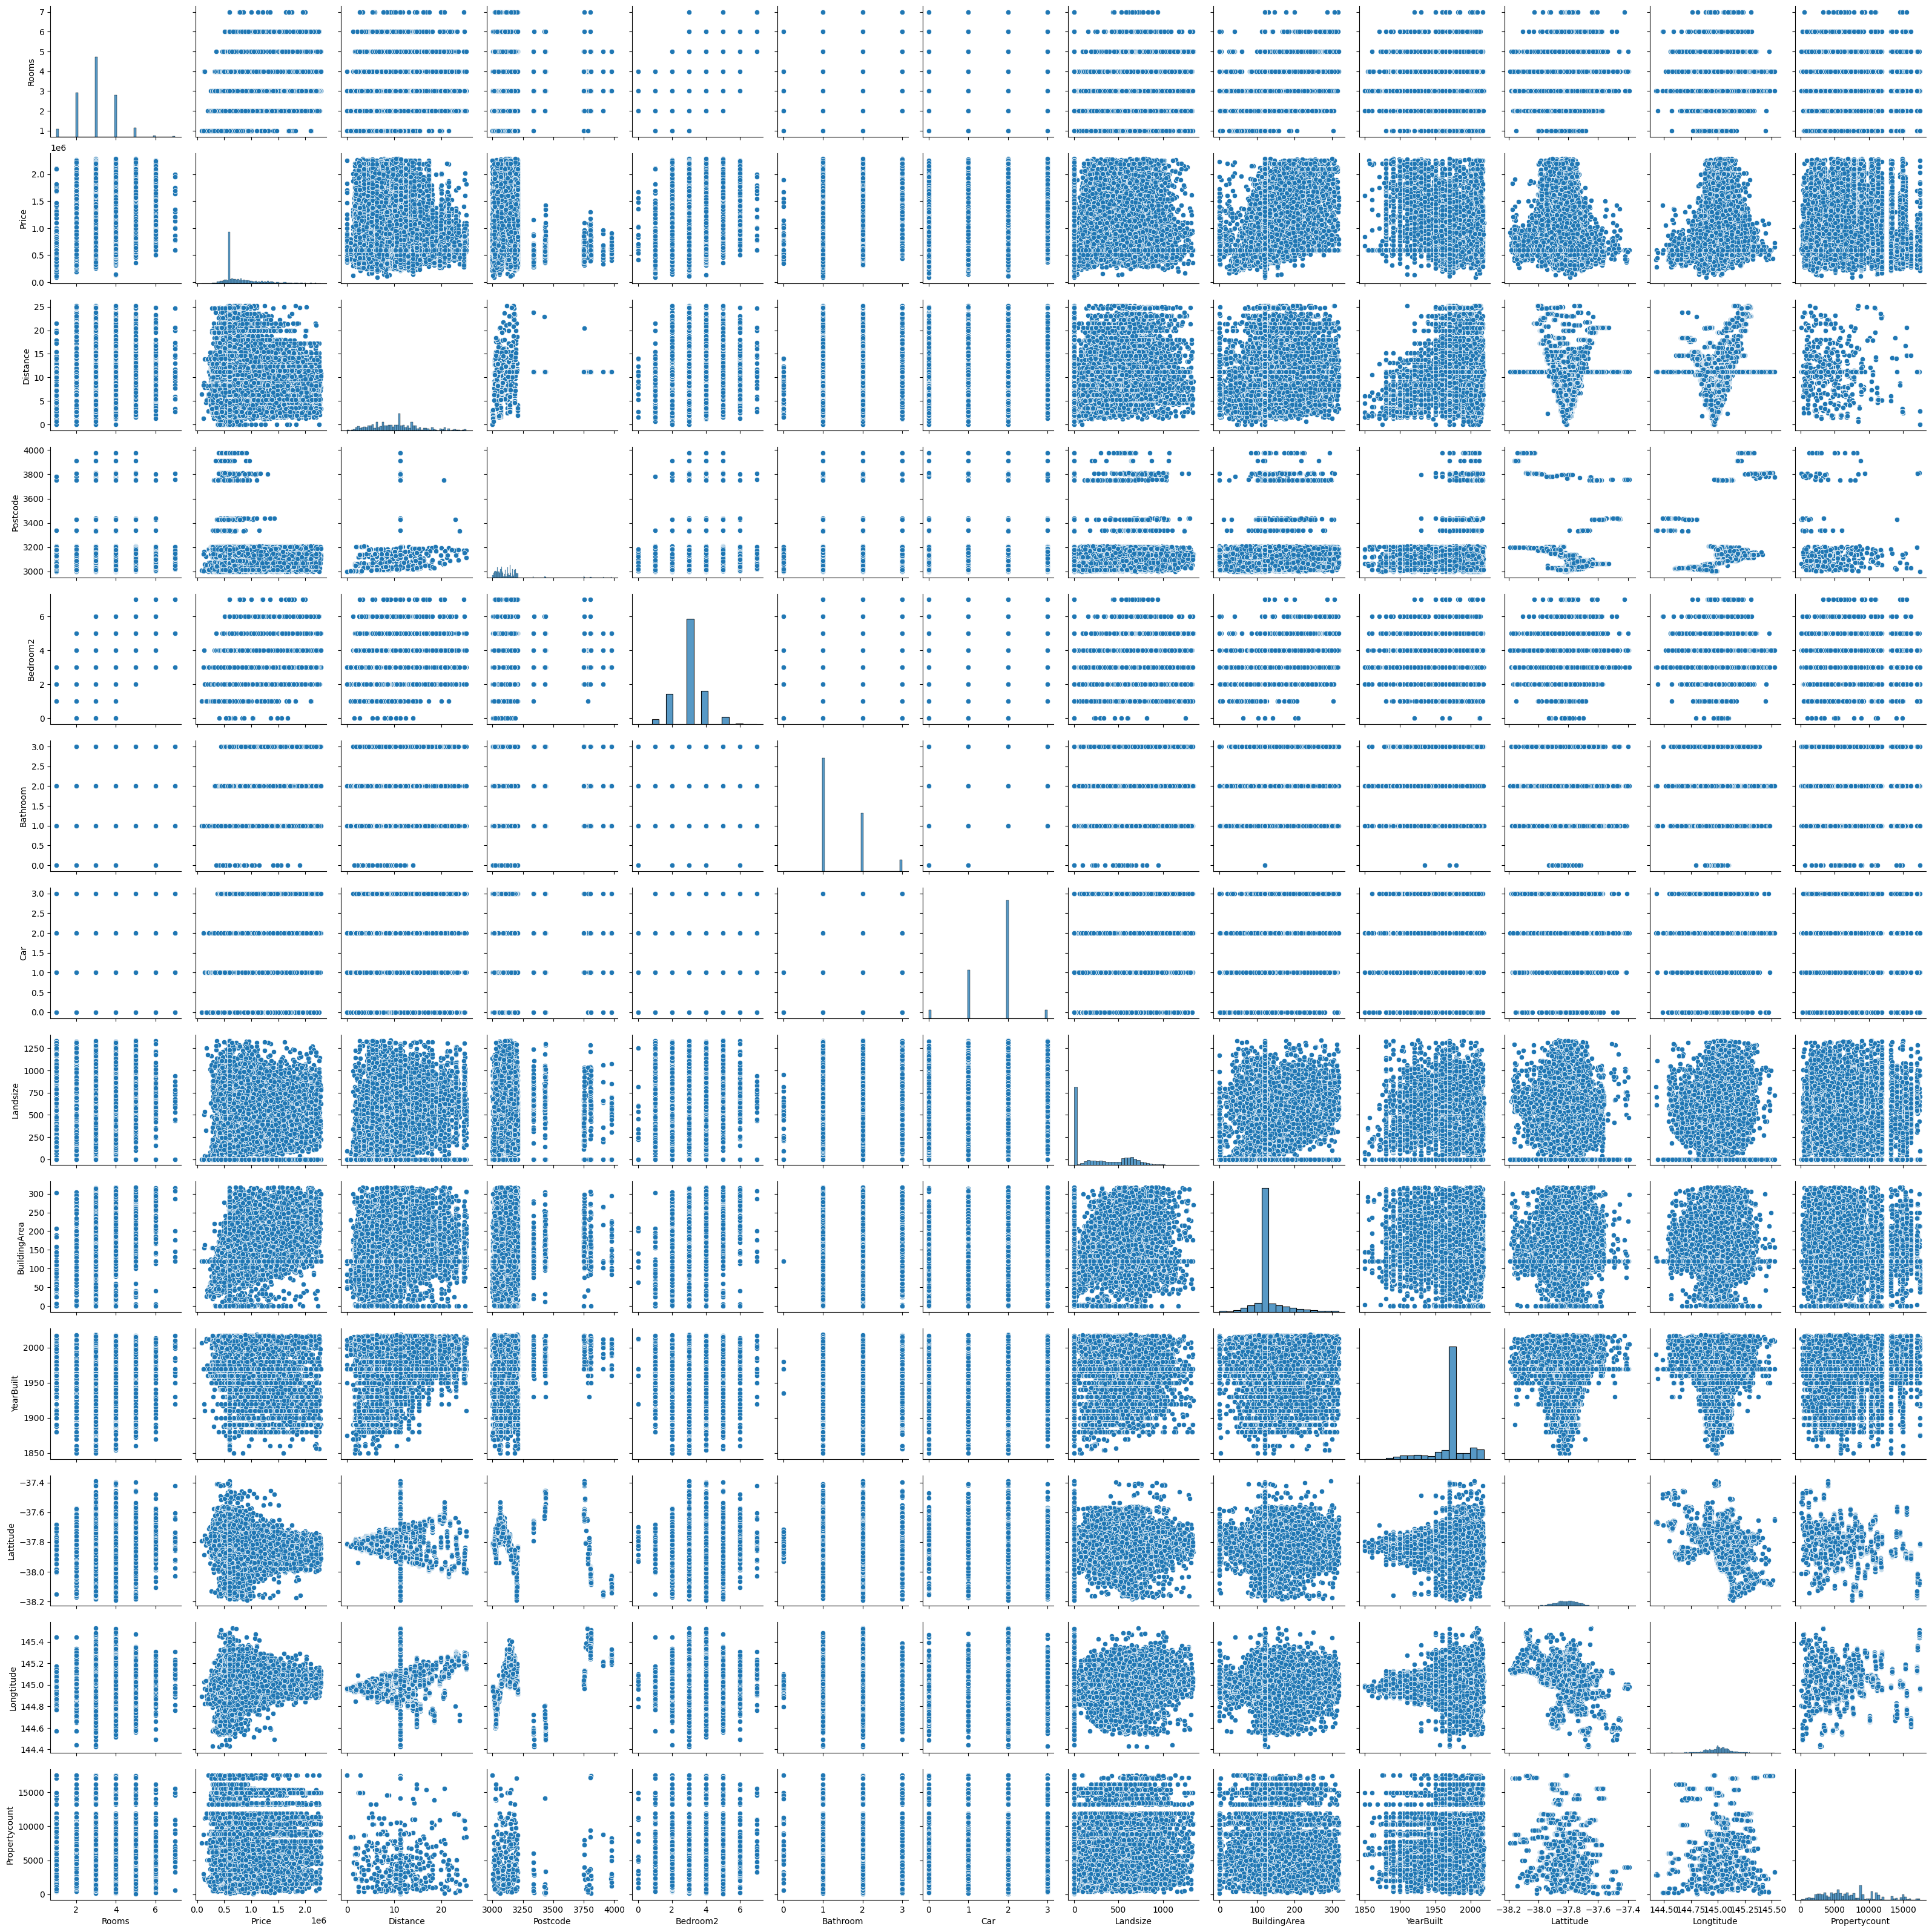

In [482]:
sns.pairplot(df)

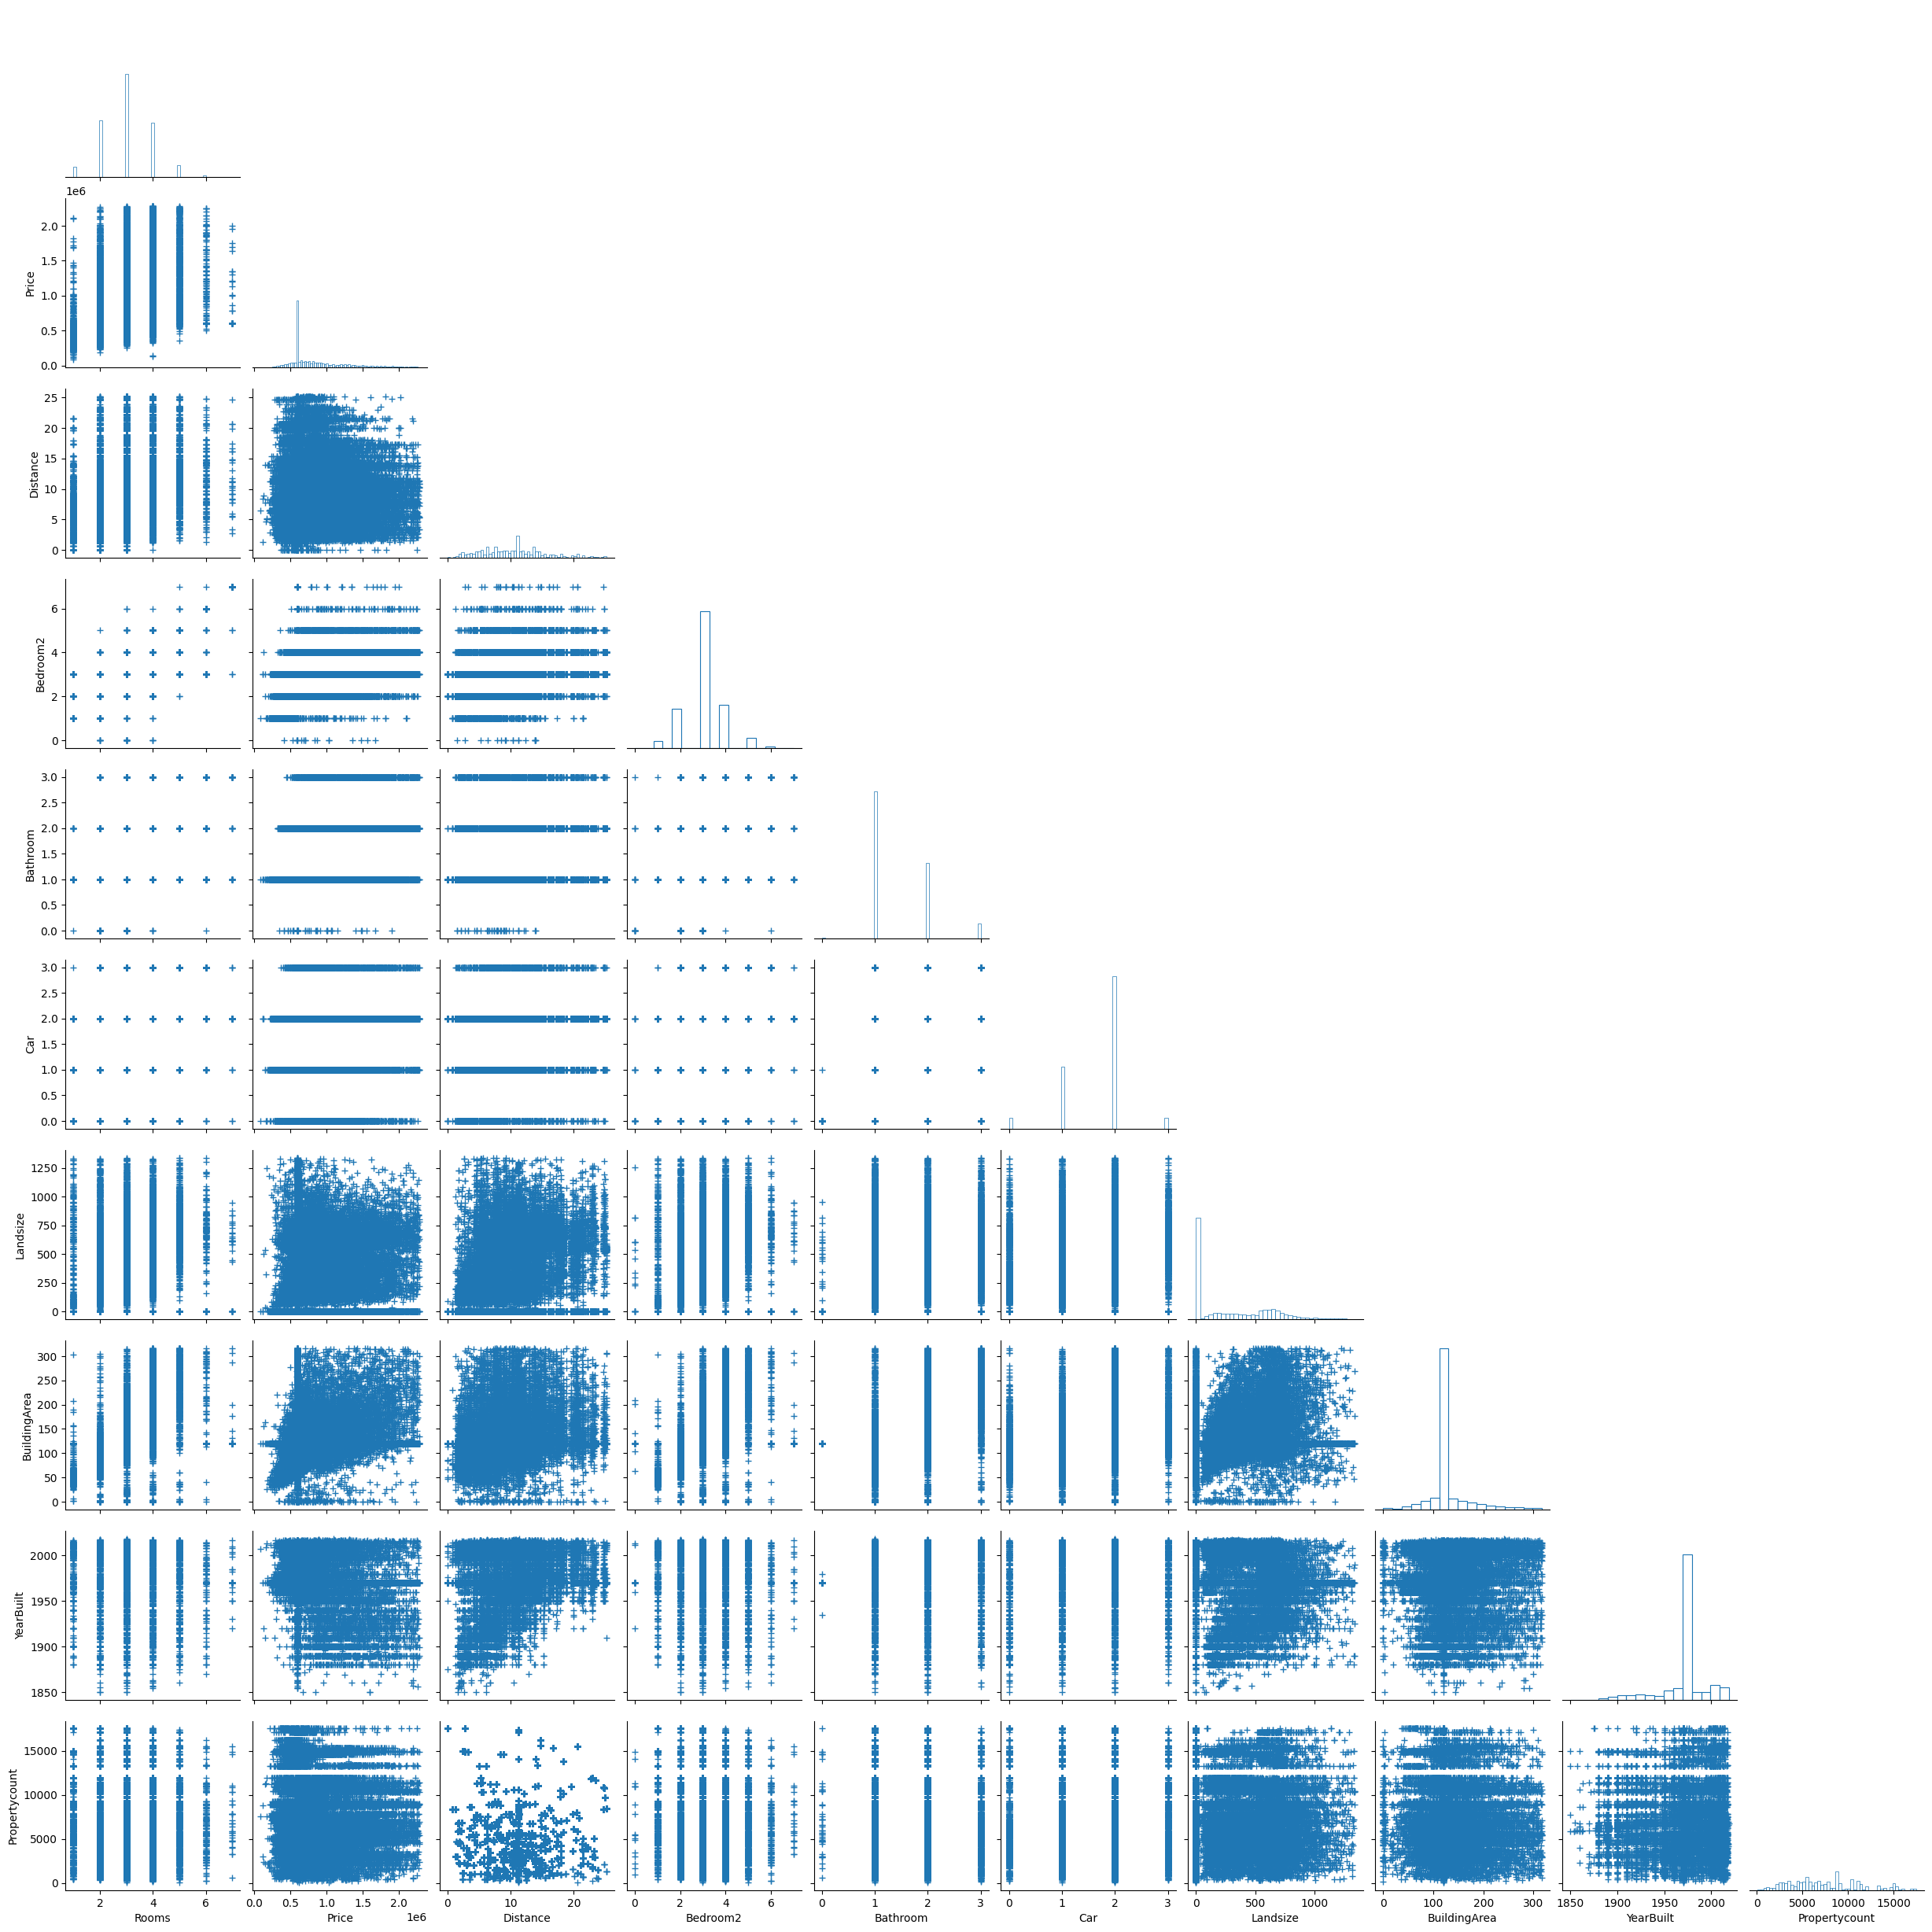

In [484]:
sns.pairplot(data=df,
            corner=True,
            vars=cols,
            plot_kws=dict(marker="+", linewidth=1),
            diag_kws=dict(fill=True),)